In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)
raw = pd.read_csv("../data/MULTI_socio_demo_9_raw.csv")

In [3]:
raw.head()

essround  idno cntry  prtvede1  prtvtdfr  prtvtfhu  prtvtcit  prtvtdpl  \
0         9    17    AT       NaN       NaN       NaN       NaN       NaN   
1         9    31    AT       NaN       NaN       NaN       NaN       NaN   
2         9    58    AT       NaN       NaN       NaN       NaN       NaN   
3         9    69    AT       NaN       NaN       NaN       NaN       NaN   
4         9    98    AT       NaN       NaN       NaN       NaN       NaN   

   agea  domicil  eduyrs  mainact  hincsrca  hinctnta  hincfel  iincsrc  \
0    43        4      12       66         1         3        3       66   
1    85        4       8       66         4         2        1       66   
2    31        3      11       66         1         8        2        1   
3    49        4      12       66         1        88        2       66   
4    67        4      12       66         4         5        2        4   

   Unnamed: 16  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [4]:
countries = ["DE","FR","IT","HU","PL"]

In [5]:
raw2 = raw[raw["cntry"].isin(countries)].drop(columns='Unnamed: 16')

In [6]:
cols = {'essround':'round',
        'cntry':'country',
        'agea':'age',
        'domicil':'urban',
        'eduyrs':'education(yy)',
        'mainact':'activity', 
        'hincsrca':'source_inc_h',
        'hinctnta':'income',
        'hincfel':'satisfaction_inc',
        'iincsrc':'source_inc_p',
        'prtvede1':'party_de',
        'prtvtdfr':'party_fr', 
        'prtvtfhu':'party_hu',
        'prtvtcit':'party_it',
        'prtvtdpl':'party_pl'}

In [7]:
multi = raw2.rename(columns=cols).reset_index(drop=True)

In [8]:
multi[['party_de','party_fr','party_it','party_hu','party_pl']] = multi[['party_de','party_fr','party_it','party_hu','party_pl']].fillna(value=0)

In [9]:
multi[['party_de','party_fr','party_it','party_hu','party_pl']] = multi[['party_de','party_fr','party_it','party_hu','party_pl']].astype(int)

In [69]:
#age_group: 1:'18-24', 2:'25-65', 3:'+65'
multi=multi.assign(age_group=np.where(multi['age'].lt(25),'18-24',np.where(multi['age'].lt(66),'25-65','66+')))

### We want to analyse the socio-economic profile of far-right voters and compare it to non far-right voters. We start by slicing our data frame into subsets for each country and group: country_f (people who voted the main far-right party in the country), country_nf(people who voted other parties)

#### DE

In [71]:
de_sode = multi[multi['country']== 'DE']

In [72]:
de_f = de_sode[de_sode["party_de"] == 6].drop(columns=['party_fr',
                                                       'party_it',
                                                       'party_pl',
                                                       'party_hu']).reset_index(drop=True)

In [73]:
de_nf = (de_sode[~de_sode["party_de"]
                 .isin([6,66,77,88,99])]
         .drop(columns=['party_fr','party_it','party_pl','party_hu'])
         .reset_index(drop=True))

#### FR

In [74]:
fr_sode = multi[multi['country']== 'FR']

In [75]:
fr_f = fr_sode[fr_sode["party_fr"] == 11].drop(columns=['party_de',
                                                        'party_it',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)

In [76]:
fr_nf = (fr_sode[~fr_sode["party_fr"]
                 .isin([11,66,77,88,99])]
         .drop(columns=['party_de','party_it','party_pl','party_hu'])
         .reset_index(drop=True))

#### IT

In [77]:
it_sode = multi[multi['country']== 'IT']

In [78]:
it_f = it_sode[it_sode["party_it"] == 9].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_pl']).reset_index(drop=True)

In [79]:
it_nf = (it_sode[~it_sode["party_it"]
                 .isin([9,66,77,88,99])]
         .drop(columns=['party_de','party_fr','party_pl','party_hu'])
         .reset_index(drop=True))

In [80]:
it_nf = it_nf[it_nf['age']!= 999]

#### PL

In [81]:
pl_sode = multi[multi['country']== 'PL']

In [82]:
pl_f = pl_sode[pl_sode["party_pl"] == 6].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_hu',
                                                        'party_it']).reset_index(drop=True)

In [83]:
pl_nf = (pl_sode[~pl_sode["party_pl"]
                 .isin([6,66,77,88,99])]
         .drop(columns=['party_de','party_fr','party_it','party_hu'])
         .reset_index(drop=True))

#### HU

In [84]:
hu_sode = multi[multi['country']== 'HU']

In [85]:
hu_f = hu_sode[hu_sode["party_hu"] == 3].drop(columns=['party_de',
                                                        'party_fr',
                                                        'party_pl',
                                                        'party_it']).reset_index(drop=True)

In [86]:
hu_nf = (hu_sode[~hu_sode["party_hu"]
                 .isin([3,66,77,88,99])]
         .drop(columns=['party_de','party_fr','party_it','party_pl'])
         .reset_index(drop=True))

### Age

Text(0.5, 1.0, 'Far-right voters')

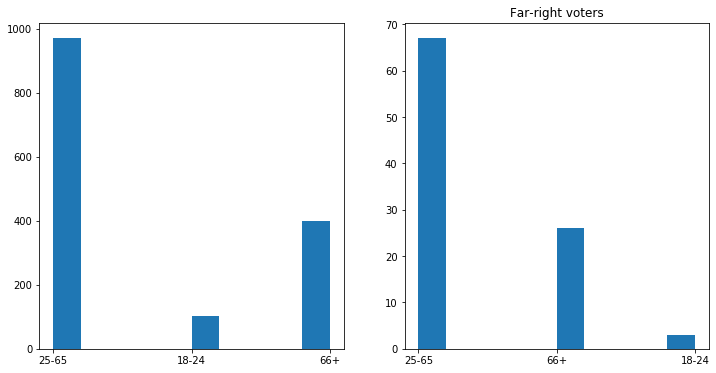

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nf['age_group']);
axes[1].hist(de_f['age_group']);
axes[1].set_title("Far-right voters")

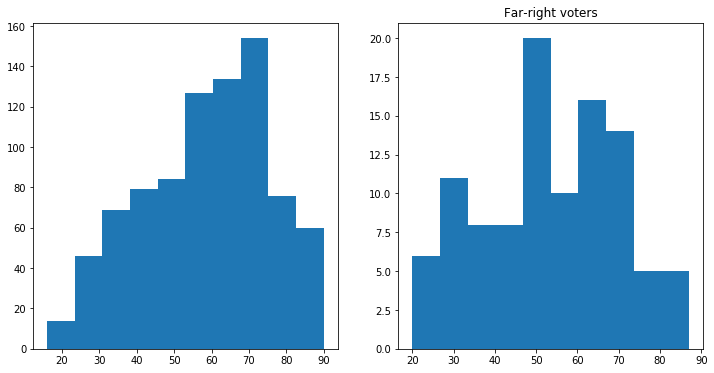

In [96]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nf['age']);
axes[1].hist(fr_f['age']);
axes[1].set_title("Far-right voters");

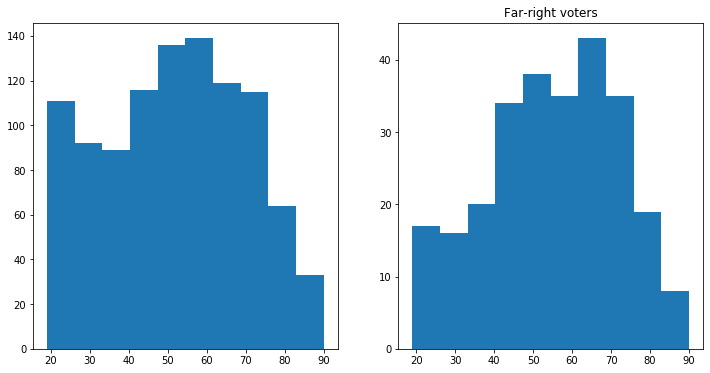

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nf['age']);
axes[1].hist(it_f['age']);
axes[1].set_title("Far-right voters");

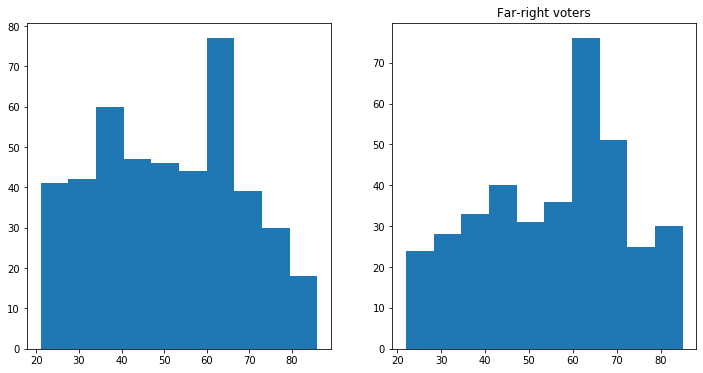

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nf['age']);
axes[1].hist(pl_f['age']);
axes[1].set_title("Far-right voters");

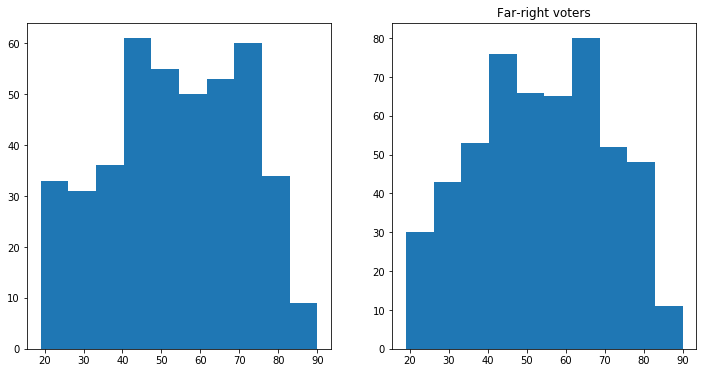

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nf['age']);
axes[1].hist(hu_f['age']);
axes[1].set_title("Far-right voters");

### Urban --> 1:A big city , 2:Suburbs or outskirts of a big city, 3:Town or small city, 4:Country village, 5:Farm or home in countryside

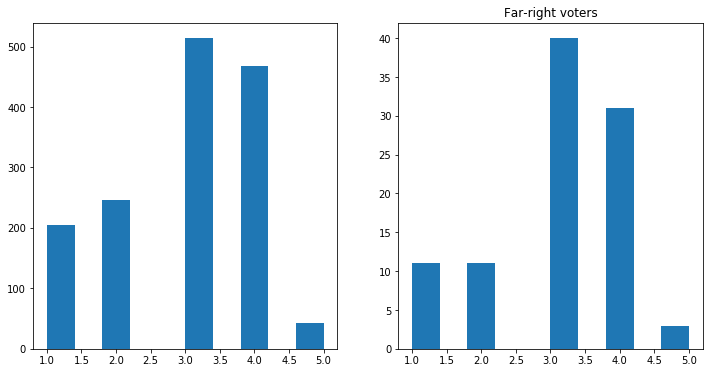

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_nf['urban']);
axes[1].hist(de_f['urban']);
axes[1].set_title("Far-right voters");

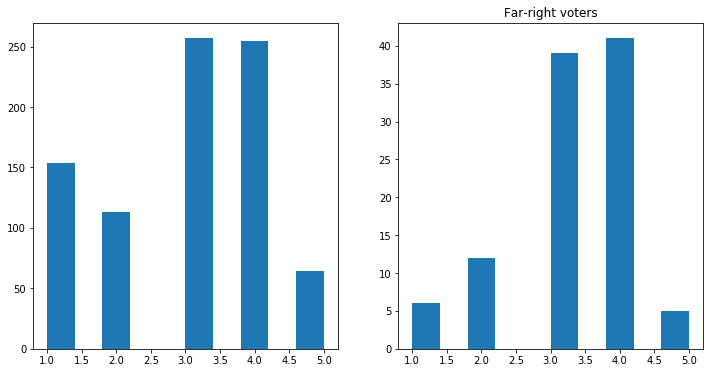

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_nf['urban']);
axes[1].hist(fr_f['urban']);
axes[1].set_title("Far-right voters");

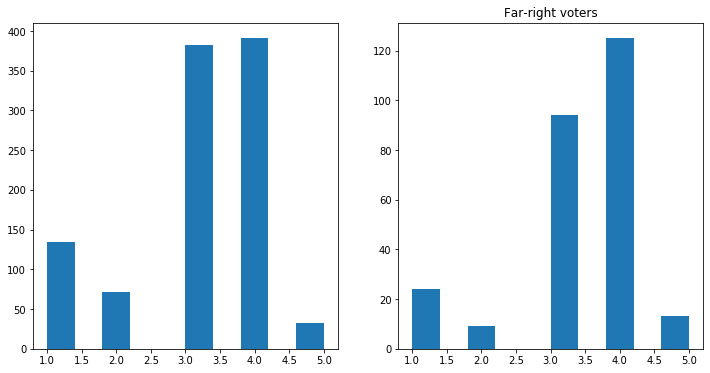

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_nf['urban']);
axes[1].hist(it_f['urban']);
axes[1].set_title("Far-right voters");

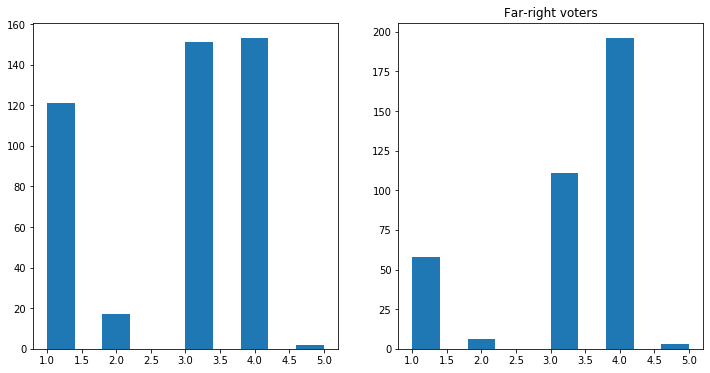

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_nf['urban']);
axes[1].hist(pl_f['urban']);
axes[1].set_title("Far-right voters");

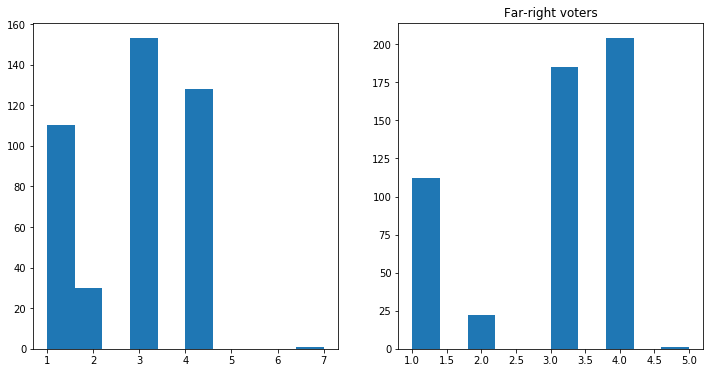

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_nf['urban']);
axes[1].hist(hu_f['urban']);
axes[1].set_title("Far-right voters");

### Years of full-time education completed

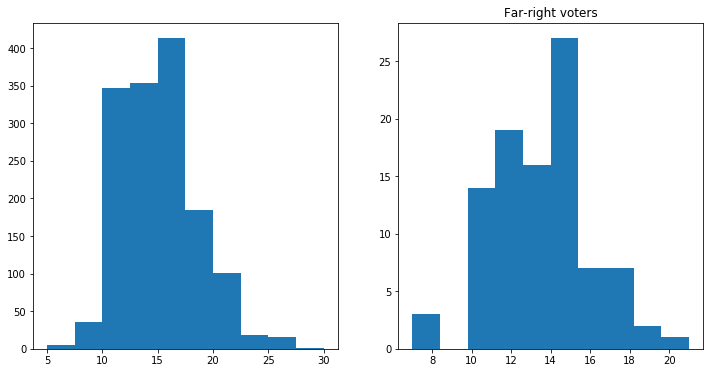

In [38]:
de_ed_f = de_f[~de_f['education(yy)'].isin([66,77,88,99])]
de_ed_nf = de_nf[~de_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_ed_nf['education(yy)']);
axes[1].hist(de_ed_f['education(yy)']);
axes[1].set_title("Far-right voters");

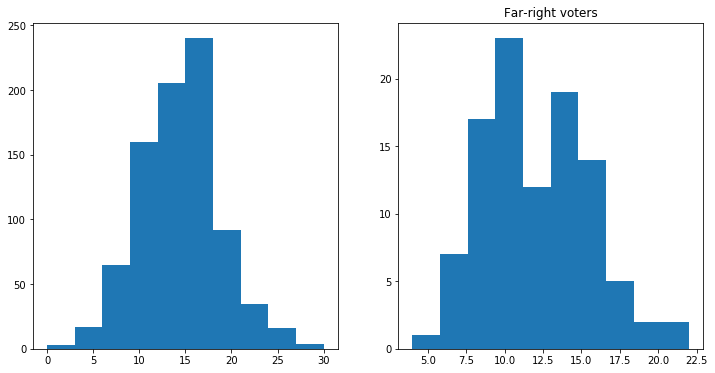

In [39]:
fr_ed_f = fr_f[~fr_f['education(yy)'].isin([66,77,88,99])]
fr_ed_nf = fr_nf[~fr_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_ed_nf['education(yy)']);
axes[1].hist(fr_ed_f['education(yy)']);
axes[1].set_title("Far-right voters");

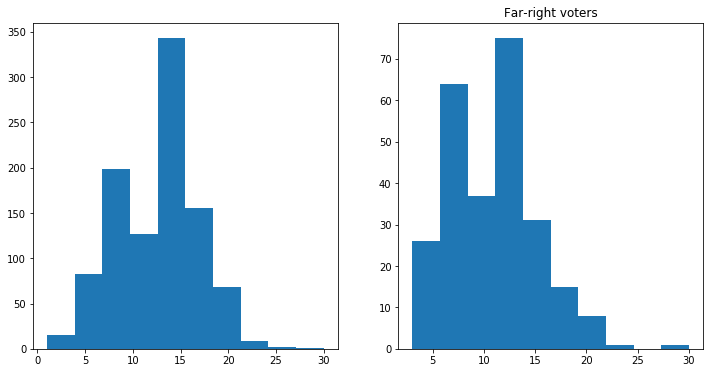

In [40]:
it_ed_f = it_f[~it_f['education(yy)'].isin([66,77,88,99])]
it_ed_nf = it_nf[~it_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_ed_nf['education(yy)']);
axes[1].hist(it_ed_f['education(yy)']);
axes[1].set_title("Far-right voters");

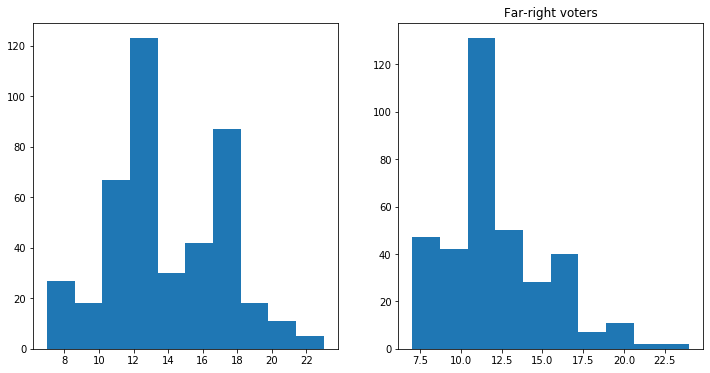

In [41]:
pl_ed_f = pl_f[~pl_f['education(yy)'].isin([66,77,88,99])]
pl_ed_nf = pl_nf[~pl_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_ed_nf['education(yy)']);
axes[1].hist(pl_ed_f['education(yy)']);
axes[1].set_title("Far-right voters");

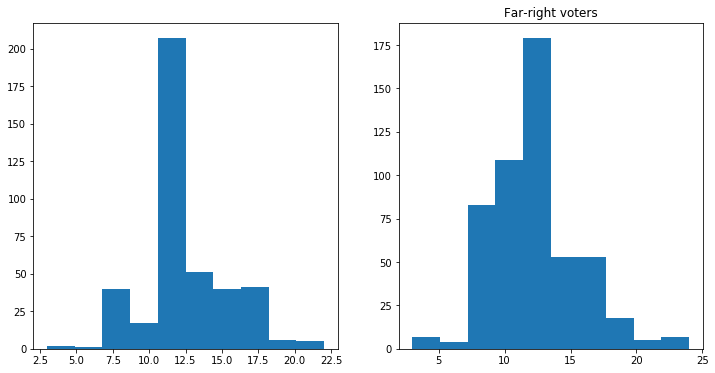

In [42]:
hu_ed_f = hu_f[~hu_f['education(yy)'].isin([66,77,88,99])]
hu_ed_nf = hu_nf[~hu_nf['education(yy)'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_ed_nf['education(yy)']);
axes[1].hist(hu_ed_f['education(yy)']);
axes[1].set_title("Far-right voters");

### Main activitiy in the last 7 days --> 1:Paid work, 2:Education, 3:Unemployed(looking for job), 4:Unemployed(not looking for job), 5:Permanently sick or disabled, 6:Retired, 7:Community or military service, 8: Housework, 9:Other

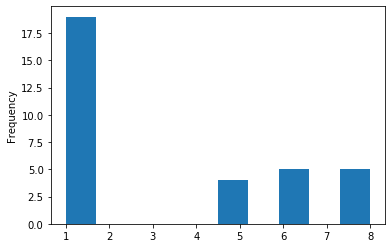

In [43]:
de_ac = de_f[~de_f['activity'].isin([66,77,88,99])]
de_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(63/96)

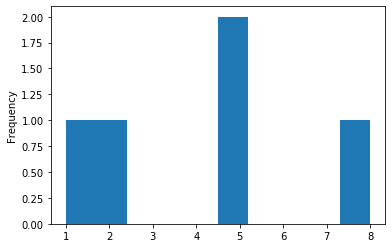

In [44]:
fr_ac = fr_f[~fr_f['activity'].isin([66,77,88,99])]
fr_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(98/103)

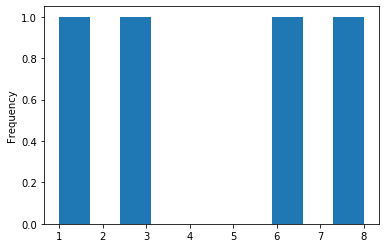

In [45]:
it_ac = it_f[~it_f['activity'].isin([66,77,88,99])]
it_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(261/265)

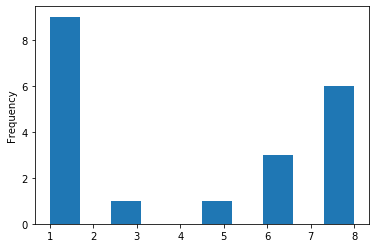

In [46]:
pl_ac = pl_f[~pl_f['activity'].isin([66,77,88,99])]
pl_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(354/374)

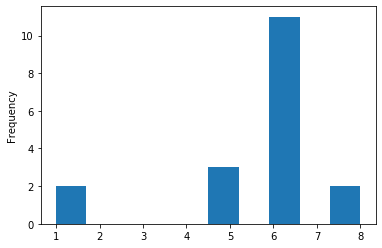

In [47]:
hu_ac = hu_f[~hu_f['activity'].isin([66,77,88,99])]
hu_ac['activity'].plot(kind='hist')
#Most people replied '66:not applicable'(506/524)

### Household´s total income --> 1: 1st decile - 10: 10th decile

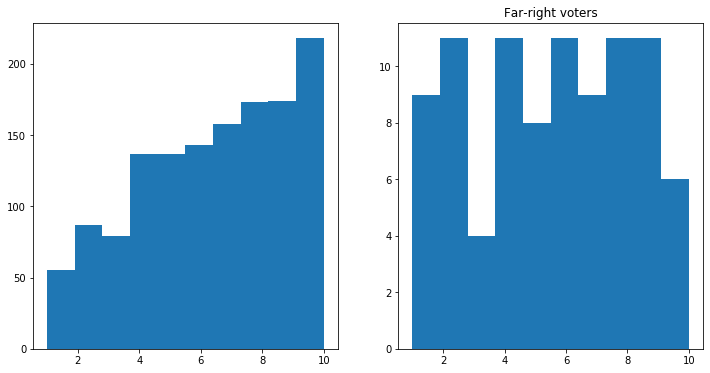

In [48]:
de_in_f = de_f[~de_f['income'].isin([66,77,88,99])]
de_in_nf = de_nf[~de_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(de_in_nf['income']);
axes[1].hist(de_in_f['income']);
axes[1].set_title("Far-right voters");

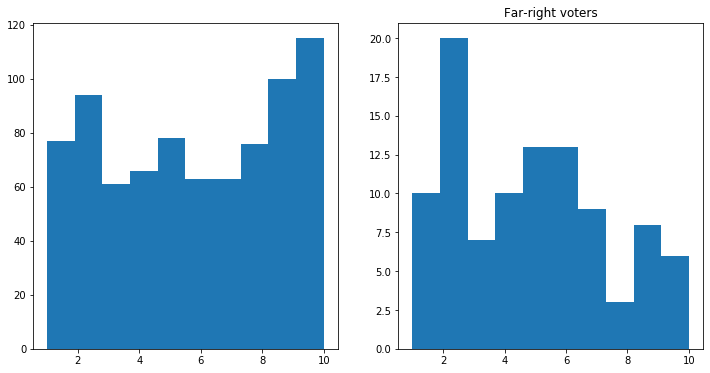

In [49]:
fr_in_f = fr_f[~fr_f['income'].isin([66,77,88,99])]
fr_in_nf = fr_nf[~fr_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(fr_in_nf['income']);
axes[1].hist(fr_in_f['income']);
axes[1].set_title("Far-right voters");

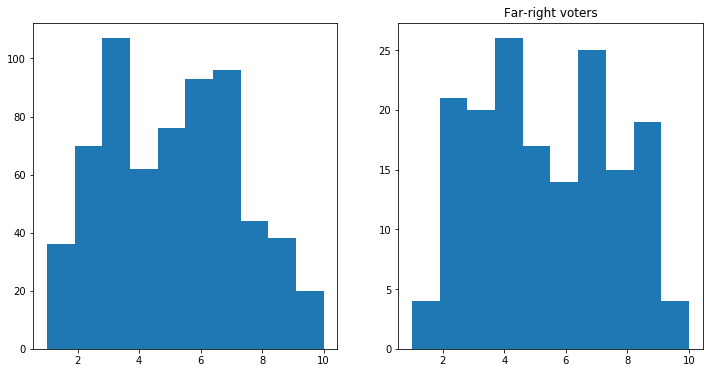

In [50]:
it_in_f = it_f[~it_f['income'].isin([66,77,88,99])]
it_in_nf = it_nf[~it_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(it_in_nf['income']);
axes[1].hist(it_in_f['income']);
axes[1].set_title("Far-right voters");
# Many people decided not to reply(78/265) or didn´t know(22/265)

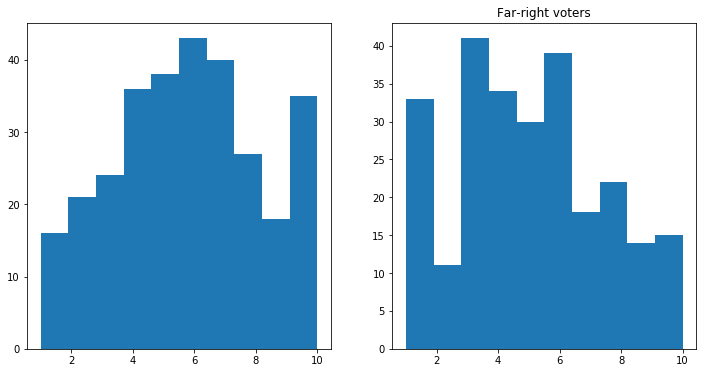

In [51]:
pl_in_f = pl_f[~pl_f['income'].isin([66,77,88,99])]
pl_in_nf = pl_nf[~pl_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(pl_in_nf['income']);
axes[1].hist(pl_in_f['income']);
axes[1].set_title("Far-right voters");
# Many people decided not to reply(87/374) or didn´t know(30/374)

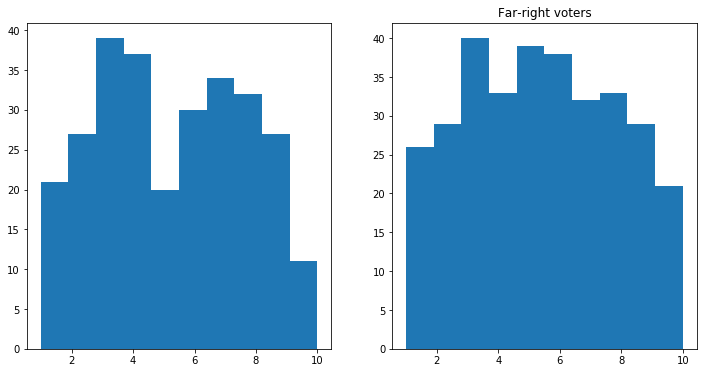

In [52]:
hu_in_f = hu_f[~hu_f['income'].isin([66,77,88,99])]
hu_in_nf = hu_nf[~hu_nf['income'].isin([66,77,88,99])]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].hist(hu_in_nf['income']);
axes[1].hist(hu_in_f['income']);
axes[1].set_title("Far-right voters");
# Most people decided not to answer (195/524)

### Feeling abouts household´s income nowadays (satisfaction_inc) --> 1:Living comfortably on present income, 2:Coping on present income, 3:Difficult on present income, 4:Very difficult on present income, 7:Refusal, 8:Don´t know, 9:No answer

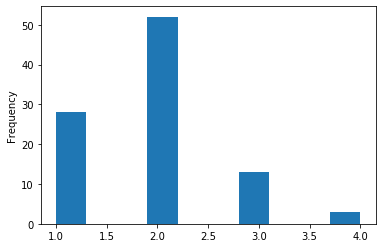

In [53]:
de_sa = de_f[~de_f['satisfaction_inc'].isin([7,8,9])]
de_sa['satisfaction_inc'].plot(kind='hist')

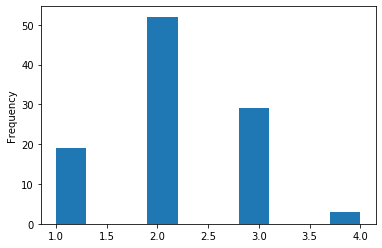

In [54]:
fr_sa = fr_f[~fr_f['satisfaction_inc'].isin([7,8,9])]
fr_sa['satisfaction_inc'].plot(kind='hist')

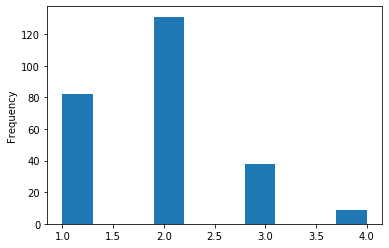

In [55]:
it_sa = it_f[~it_f['satisfaction_inc'].isin([7,8,9])]
it_sa['satisfaction_inc'].plot(kind='hist')

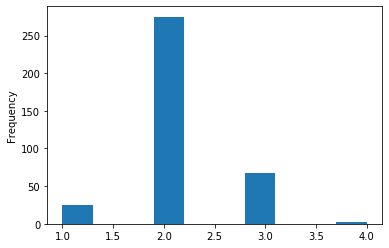

In [56]:
pl_sa = pl_f[~pl_f['satisfaction_inc'].isin([7,8,9])]
pl_sa['satisfaction_inc'].plot(kind='hist')

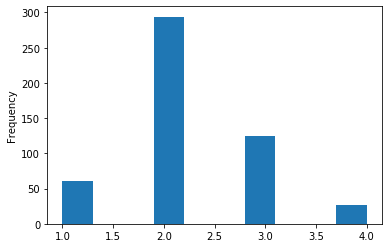

In [57]:
hu_sa = hu_f[~hu_f['satisfaction_inc'].isin([7,8,9])]
hu_sa['satisfaction_inc'].plot(kind='hist')

### Respondent´s main source of income --> 1:Wage or salaries, 2:Income from self-employment (excluding farming), 3:Income from farming, 4:Pensions, 5:Unemployment/redundancy benefit, 6:Any other social benefits or grants, 7:Income from investments/savings, 8: Income from other sources, 9:No personal income

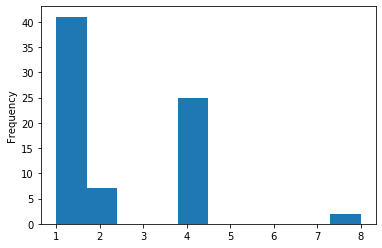

In [58]:
de_so = de_f[~de_f['source_inc_p'].isin([66,77,88,99])]
de_so['source_inc_p'].plot(kind='hist')

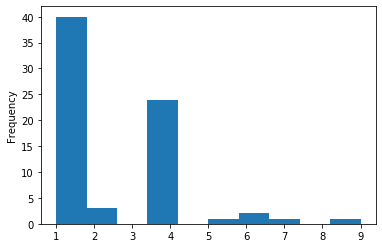

In [59]:
fr_so = fr_f[~fr_f['source_inc_p'].isin([66,77,88,99])]
fr_so['source_inc_p'].plot(kind='hist')

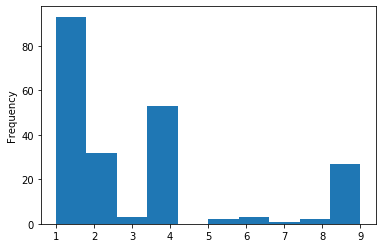

In [60]:
it_so = it_f[~it_f['source_inc_p'].isin([66,77,88,99])]
it_so['source_inc_p'].plot(kind='hist')

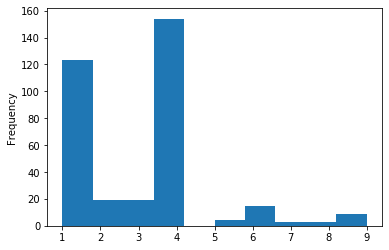

In [61]:
pl_so = pl_f[~pl_f['source_inc_p'].isin([66,77,88,99])]
pl_so['source_inc_p'].plot(kind='hist')

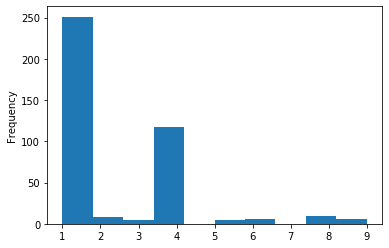

In [62]:
hu_so = hu_f[~hu_f['source_inc_p'].isin([66,77,88,99])]
hu_so['source_inc_p'].plot(kind='hist')